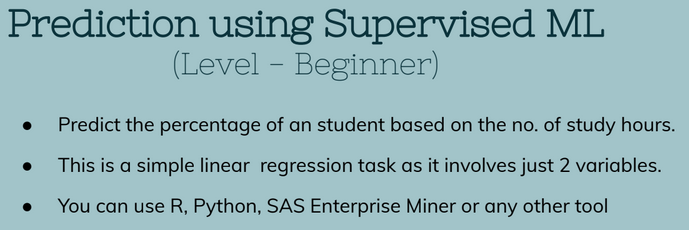

#### AUTHOR - Sruthi Sudheer

##### Importing initially required libraries

In [1]:
import pandas as pd
import numpy as np

##### Reading Data

In [2]:
data='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

df=pd.read_csv(data)  # Reading and creating pandas dataframe

##### Displaying the first five rows of the data

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


So, the two columns available in the dataset are 'Hours' and 'Scores'.'Scores' is the target variable.(Supervised ML)

##### Number of (Rows,Columns) in the dataframe

In [4]:
df.shape

(25, 2)

The dataframe has 25 rows and 2 columns.

##### Column data types

In [5]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

Both the columns are of continuous nature. Since, the output variable is 'continuous', the problem is a Regression problem.

##### Checking for missing values

In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no missing values in the data.

##### Removing duplicate rows

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(25, 2)

There are no duplicate values in the dataset.

> ##### Univariate Analysis

##### Descriptive Statistical summary of the two columns

In [9]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


The mean, standard deviation, max, min values of both the columns can be seen in the above result.

##### Importing library for data visualization

In [10]:
import seaborn as sns

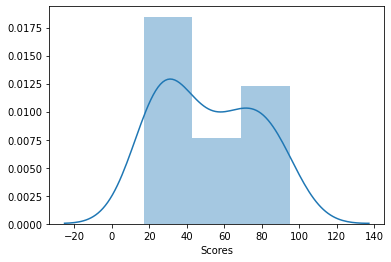

In [11]:
sns.distplot(df['Scores'])

The above plot depicts the variations in the 'Scores' data distribution.

It can be roughly inferred that the frequency(count) of:

Scores(17<score<40) > Scores(70<score<95) > Scores(40<score<70)

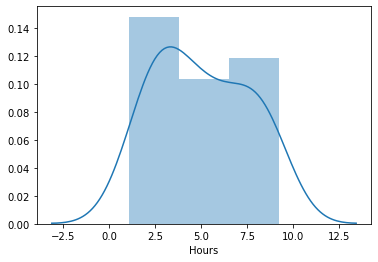

In [12]:
sns.distplot(df['Hours'])

The above plot depicts the variations in the 'Hours' data distribution.

It can be roughly inferred that the frequency(count) of:

Hours(1.1<score<3) > Scores(7<score<9.2) > Scores(3<score<7)

> The data distributions of both the columns are almost similar.

> ##### Bi-variate analysis

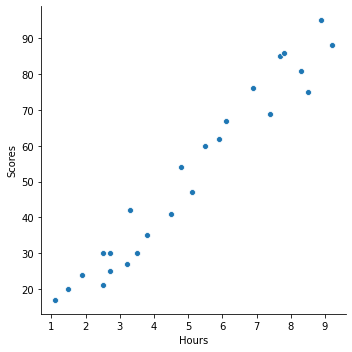

In [13]:
sns.relplot(x="Hours",y="Scores",data=df,kind="scatter")

The scatter plot helps in understanding the influence of 'Hours' to the target variable 'Scores'.

The plot depicts an uphill pattern from left to right which indicates a positive relationship between 'Hours' and 'Scores'. 

So, as the the values of 'Hours' increase(X-axis), the values of 'Scores' tend to increase(Y-axis).

##### Separating the target variable from the predictor variable.

In [14]:
x_df=df.drop('Scores',axis=1)
y_df=df['Scores']

##### Splitting the dataset into train and test data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
trainX, testX, trainY, testY = train_test_split(x_df,y_df,test_size=0.2,random_state=100)
# train data=80%, test data=20%

##### Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lreg=LinearRegression()

In [19]:
lreg.fit(trainX,trainY)

LinearRegression()

In [20]:
preds=lreg.predict(testX)
preds

array([28.54512294, 39.36411177, 34.44638957, 60.01854497, 16.74258969])

In [21]:
lreg.score(testX,testY)

0.9050356232459791

In [22]:
results = pd.DataFrame({'Actual': testY, 'Predicted': preds})  
results

,Actual,Predicted
9,25,28.545123
22,35,39.364112
13,42,34.446390
11,62,60.018545
5,20,16.742590


##### Evaluation of the model

In [23]:
from sklearn import metrics 
er1=metrics.mean_absolute_error(testY, preds)
print('Mean Absolute Error:',er1) 

Mean Absolute Error: 4.140342096254413


A mean absolute error of 4.140 is obtained on using the model on test data.

In [24]:
ans1=lreg.predict(np.array([9.25]).reshape(1, 1))
print(ans1)

[92.96728365]


> #### What will be predicted score if a student studies for 9.25 hrs/ day?

> As per the Simple Linear Regression model fit on the given data;
 the predicted score if a student studies for 9.25 hours/day is 92.967.

##### Scaling the data using StandardScaler
(By removing the mean and scaling to unit variance.)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [27]:
scaled_df=pd.DataFrame(scaled_data)
scaled_df.columns = ['Hours', 'Scores']
scaled_df.head()

,Hours,Scores
0,-1.015328,-1.230223
1,0.035569,-0.180820
2,-0.732394,-0.988053
3,1.409819,0.949306
4,-0.611137,-0.866968


In [28]:
std  = np.sqrt(scaler.var_)
np.save('std.npy',std)
np.save('mean.npy',scaler.mean_)
# The std, mean can be obtained easily from the df.describe() as well.

In [29]:
s = np.load('std.npy')
m = np.load('mean.npy')

In [30]:
s, m

(array([ 2.4740768 , 24.77598838]), array([ 5.012, 51.48 ]))

In [31]:
s

array([ 2.4740768 , 24.77598838])

In [32]:
x_df2=scaled_df.drop('Scores',axis=1)
y_df2=scaled_df['Scores']


In [33]:
trainX2, testX2, trainY2, testY2 = train_test_split(x_df2,y_df2,test_size=0.2,random_state=100)
lreg.fit(trainX2,trainY2)

LinearRegression()

In [34]:
preds2=lreg.predict(testX2)
preds2

array([-0.92568969, -0.48901735, -0.68750478,  0.34462984, -1.40205952])

In [35]:
er2=metrics.mean_absolute_error(testY2, preds2)
print('Mean Absolute Error:',er2) 

Mean Absolute Error: 0.16711107679930146


The mean absolute error = 0.1671, which is less than that of the previous case. This is due to scaling of the features.

In [36]:
sH, mH = s[0], m[0]
sS, mS = s[1], m[1]

In [37]:
ans2=lreg.predict(((np.array([9.25]-mH))/sH).reshape(1, 1))
print(ans2)

[1.67449561]


In [38]:
cAns=(ans2*sS)+mS
cAns

array([92.96728365])

##### Decision Tree Regressor

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
dtreg=DecisionTreeRegressor(random_state=0) 

In [41]:
dtreg.fit(trainX,trainY)

DecisionTreeRegressor(random_state=0)

In [42]:
preds3=dtreg.predict(testX)
preds3

array([30., 30., 27., 67., 17.])

In [43]:
results3 = pd.DataFrame({'Actual': testY, 'Predicted': preds3})  
results3

,Actual,Predicted
9,25,30.0
22,35,30.0
13,42,27.0
11,62,67.0
5,20,17.0


In [44]:
er3=metrics.mean_absolute_error(testY, preds3)
print('Mean Absolute Error:',er3) 

Mean Absolute Error: 6.6


A mean absolute error of 6.6 is obtained in this case.

In [45]:
ans3=dtreg.predict(np.array([9.25]).reshape(1, 1))
print(ans3)

[88.]


##### KNN Regressor

In [46]:
from sklearn import neighbors

In [47]:
mse_val = [] 
for K in range(1,6):    
    model = neighbors.KNeighborsRegressor(n_neighbors = K,weights='distance')
    model.fit(trainX, trainY)  
    pred=model.predict(testX) #make prediction on test set
    error = metrics.mean_absolute_error(testY,pred) #calculate mse
    mse_val.append(error) #store mse values
    print('MSE value for k= ' , K , 'is:', error)

MSE value for k=  1 is: 6.6
MSE value for k=  2 is: 5.633333333333336
MSE value for k=  3 is: 4.571904761904767
MSE value for k=  4 is: 4.624384530198487
MSE value for k=  5 is: 4.704851481321201


The mean squared error obtained at various K values are obtained as above. The least error is obtained at k=3 and hence model is fit with number of neighbours=3 and prediction is done.

In [48]:
er4=mse_val[2]
er4

4.571904761904767

In [49]:
model = neighbors.KNeighborsRegressor(n_neighbors = 3,weights='distance')
model.fit(trainX, trainY)
ans4=model.predict(np.array([9.25]).reshape(1, 1))
print(ans4)

[88.11023622]


In [50]:
er=[er1,er2,er3,er4]
Ans=[ans1,cAns,ans3,ans4]
models=['LR','LR+Scaling','DT','KNN']
reDf=pd.DataFrame({'Algorithm':models,'Score(answer)':Ans,'Mean Squared Error':er})
reDf


,Algorithm,Score(answer),Mean Squared Error
0,LR,[92.96728365185982],4.140342
1,LR+Scaling,[92.9672836518598],0.167111
2,DT,[88.0],6.600000
3,KNN,[88.11023622047243],4.571905
